<a href="https://colab.research.google.com/github/Salahidine2002/ODEs-and-NN/blob/main/First_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# ***About PDE***

Understanding and explaining the universe and how it works has been the main mission of scientists forever, and differential equations has always been that one constantly used tool to translate the magic to logic. Almost every mysterious phenomenon can be described and simulated using a set of differential equations not only in physics but also in biology, engineering, chemistry, finance … In this article I’ll give you a free brief tour about DEs, not the theory side of it but the computational and practical side.







**Table of Contents**


**--** Preliminary **--**


**1.**   Numerical methods of resolution

  *   *Introduction*
  *   *Euler's implicit and explicit methods*
  *   *Other methods*

**2.**   Neural networks and ODEs
  

  *   *Introduction*
  *   *NNs and ODEs*



**3.**   Application and simulation





*Note :* before you start reading the article it would be great if you downloaded processing software, I use it a lot for simulations because of its simplicity, and you should have it if you want to execute the codes yourself.

*Link* : https://processing.org/download

# ----- Preliminary -----

The formal definition of the ODEs we're gonna try to solve : 

<center><img src="https://drive.google.com/uc?export=view&id=1PsiAJqHGUt-4nAXKH3P8zMJxuhyr9PrT" alt="fishy" class="bg-primary" width="350px" align="center"> <center>


Let's suppose for the moment that all the conditions of Picard–Lindelöf theorem are satisfied so that we can have the existence of a global (or local) unique solution .

# 1. Numerical methods of resolution



*   **Introduction**


  A numerical method, generally, doesn’t give you an analytic solution for the DE, instead, it will give you the state of your system in multiple points of a certain interval. It may seem like if it’s useless and not as powerful as the analytic solution, but sometimes if not all the time that’s all we need. 
  Since we’re looking for a numerical solution, we should find a method to discretize the problem and find the solution using just the information we have in hand (the expression of the derivative and the initial value). Hmmm … derivative!  The first intuitive idea that may came to mind is using the tangent at each point to calculate the value of the solution in the next point starting from $t^0$ and its given value $y^0$.

  Let’s see the demo on the example of a simple ED: 




<center>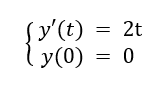 <center>

To which we’re gonna try to find a solution in the intervalley $[0, 10]$. 

 - **demo** :

In [ ]:
#importing the necessary libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


# animation settings
fig, ax = plt.subplots()
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 100))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

# the expretion of F in our ODE
def F(t):
    return 2*t

# animation function. This is called sequentially
def animate(i):
    global step
    x = np.linspace(0, 10, 1000)
    y = np.zeros(1000)
    I_step = int(100*step) 
    for j in range(i) :
      for k in range(j*I_step+1, (j+1)*I_step+1) :
        y[k] = F(x[j*I_step])*(x[k]-x[j*I_step]) + y[j*I_step]    
    line.set_data(x[:i*I_step], y[:i*I_step])
    return (line,)
    
# Each eteration we gonna implement the methode with a defferent step value to see the difference
steps = [2, 1, 0.5, 0.1]
animations = []
for step in steps :
  anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=int(10/step), interval=500, blit=True)
  HTML(anim.to_html5_video()) 
  animations.append(anim)
rc('animation', html='html5')


In [ ]:
# execute to display animation

# for step=2
animations[0] 

In [ ]:
# for step=1
animations[1] 

In [ ]:
# for step=0.5
animations[2] 

In [ ]:
# for step=0.1
animations[3] 

We can easily see that as we make the step smaller as the precision of our approximated solution get better, following that same general logic a lot of the numerical methods take place like Euler’s methods in the following paragraph.

*   **Euler's implicit and explicit methods**


Euler's methods are a particular forms of k-step methods defined in general for a sequence  $(z_{n})_{n\in\{0, ..., N\}}$  as :

$$z_{n+1} = F_T(t_n, z_{n+1}, z_{n}, z_{n-1}, ..., z_{n-k+1})$$ 

if $F_T$ depends on $z_{n+1}$ we call the method implicit, else we call it explicit

Let $h>0$ Using Taylor expansion yields we have :
$$y(t^0+h) = y(t^0) + h.y'(t^0) + O(h^2)$$

For little values of h we can say :
$$y(t^0+h) \approx y(t^0) + h.y'(t^0)$$ 

Let $t_n = t^0 + nh$  And  $y_n = y(t_n)$
, using the approximation we just found and the expression of the derivitave : $$y_n \approx y_{n-1} + h.F(t, y_{n-1}) $$

And that's the formula of forward Euler's method, and yes you guessed it, it's explicit because in this case $F_T(t, y_{n-1})=y_{n-1} + h.F(t, y_{n-1})$ wich doesn't depend on $y_{n+1}$

In the other side Euler's backward method (wich is implicit) follow this formula : $$y_n \approx y_{n-1} + h.F(t, y_{n}) $$
But wait how can we calculate $y_n$ if $F_T$ depend on $y_n$ itself ⁉ Exactly. We have to solve the equation to find $y_n$ that's why it's called 'implicit'.


PS : We can proove mathematically that both methods converge to the true solution if $h$ approaches $0$ using **Lax equivalence theorem** by prooving that both methods are *consistent* and *stable*.

The following code shows a comparison between the solution found by the two methods and the true solution for this simple DE :


<center>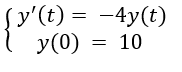 <center>

In this case, Euler explicit's expression would be : $$y_n = y_{n-1} - 4.hy_{n-1} $$
And Euler implicit's expression would be : $$y_n = y_{n-1} - 4.hy_{n} $$
Which means  $$y_n = \frac{y_{n-1}}{1+4.h} $$

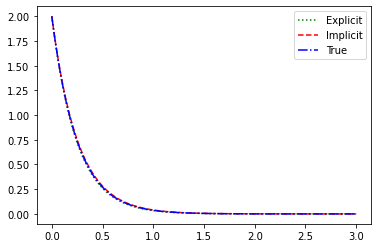

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def F(y):
  return -4*y

def euler_explicit(f, a, b, N, y0):
  y = y0
  t = a
  h = (b-a)/N
  Y = [y0]
  T = [a]
  for i in range(N):
    t += h
    y += h*f(y)
    Y.append(y)
    T.append(t)
  return T, Y    

def euler_implicit(f, a, b, N, y0):
  y = y0
  t = a
  h = (b-a)/N
  Y = [y0]
  T = [a]
  for i in range(N):
    t += h
    y = y/(1+4*h)
    Y.append(y)
    T.append(t)
  return T, Y     

## true solution
def sol(T):
  return 2*np.exp(-4*T)

T1, Y1 = euler_explicit(F, 0, 3, 300, 2)
T2, Y2 = euler_implicit(F, 0, 3, 300, 2)
Y3 = sol(np.array(T1))
plt.plot(T1, Y1, ':', label="Explicit", color='green')
plt.plot(T2, Y2, '--', label="Implicit", color='red')
plt.plot(T1, Y3, "-.", label="True", color='blue')
plt.legend()
plt.show()

As you can see for a big number of subdivision (N=1000) we had a very precise approximation of the real solution from both solutions since the three resulting plots coincide, but is there really a difference between the two methods ⁉

Response:
  - In terms of coding and simplicity, explicit method is better because it’s easy to implement since you only have to increment the values by the step multiplied by the image calculated by the function F using it’s given expression. In the other hand, implicit method is more complicated (not in this example) because you must solve an equation to find $y_{n}$ which is not always easy.


  - In terms of stability, (a problem we face if the interval of resolution is large) implicit method is better because at least it will always converge to the final value taken by the true solution (if it converges), instead explicit method can diverge (see next demo).  


/usr/local/lib/python3.7/dist-packages/matplotlib/ticker.py:2161: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


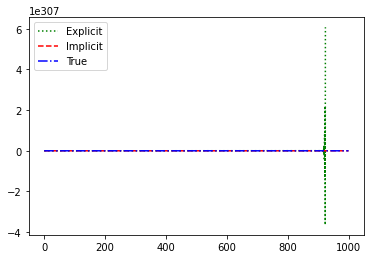

In [ ]:
T1, Y1 = euler_explicit(F, 0, 1000, 1500, 2)
T2, Y2 = euler_implicit(F, 0, 1000, 1500, 2)
Y3 = sol(np.array(T1))
plt.plot(T1, Y1, ':', label="Explicit", color='green')
plt.plot(T2, Y2, '--', label="Implicit", color='red')
plt.plot(T1, Y3, "-.", label="True", color='blue')
plt.legend()
plt.show()

We can see that the implicit method converge to 0 like the true solution but the explicit method doesn't. As a generalization we can say (and prove) that explicit method needs an h-value (the step) less than a certain threshold that depends on the DE parameters, so whenever you chose to use it, make sure that the step is small enough.



*   **Other methods**



The simple Euler’s method belongs to the one-step numerical methods family which contains also trapezoidal method, Runge-Kutta methods … And there is also the  Multistep numerical methods family that uses a linear combination of multiple points to approximate the next one with a better accuracy. 

#2.   Neural networks and ODEs



*  **Introduction**


After I worked with both neural networks and ODEs, I had this idea of trying to solve the differential equations using neural networks, but after a short research, I found that the idea was firstly described by [Lagaris et al.](https://arxiv.org/pdf/physics/9705023.pdf).
The insight behind it is basically training a neural network in order to his solution satisfies the conditions required by a differential equation. In other words, we need to find a function whose derivative satisfies the ODE conditions. In this paragraph, we will be going through the underlying mathematical foundations of this concept and then we will implement it using TensorFlow 2.0. 

  Before diving in the method, I would like to briefly introduce the neural networks and how we train them to do certain prediction. An artificial neural network (ANN) is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer) to the last layer (the output layer), possibly after traversing the layers multiple times.




<center>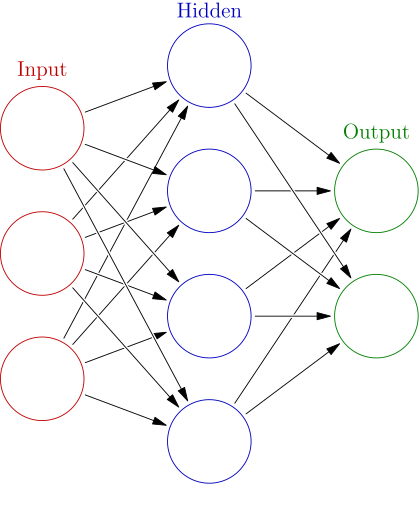 <center>

  Neural networks learn (or are trained) by processing examples, each of which contains a known "input" and "result," forming probability-weighted associations between the two, which are stored within the data structure of the net itself. The training of a neural network from a given example is usually conducted by determining the difference between the processed output of the network (often a prediction) and a target output. This difference is the error. The network then adjusts its weighted associations according to a learning rule and using this error value. Successive adjustments will cause the neural network to produce output which is increasingly similar to the target output. After a sufficient number of these adjustments the training can be terminated based upon certain criteria. This is known as supervised learning.


One of the main methods to "adjust" the network neuron's weights is the gradient descent, which is an iterative optimization algorithm for finding the local minimum of the error function we mentioned earlier (because the main goal is to minimize this error as much as possible). To do so we take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point (as shown in the figure).

<center>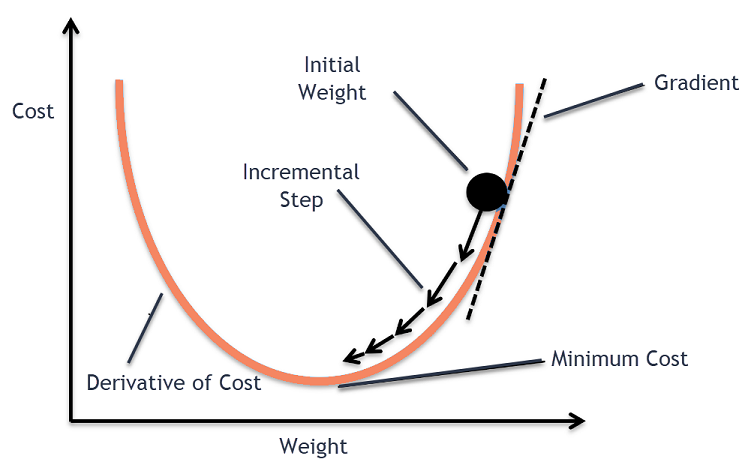 <center>

If we suppose that $J(θ_{0}, θ_{1})$ the cost (error) function that depends on two parameters (or node weights) that we should adjust to minimize the cost, then the general formula would be : $$ while \; \; \; J>\epsilon \; : \\θ_{i} := θ_{i} - \frac{\partial J(θ_{0}, θ_{1})}{\partial θ_{i}}$$ 



*   **Example**



Let's consider the following situation we have a list of points that we know are given by a function in this from : $f(x) = A.(1-exp(-kx)) $ but we don't know the parameters A and k, we can find them using the gradient descent method, by starting with random values for A and k and triying to minimize the error between the real function and the function with our parameters. But first we should fixe a method to calculate the error, don't forget that the objects on which we're working on here are functions, and the most intuitive idea to calculate the error or the "distance" between two functions is to caclulat the integral of theire difference, and that's indeed what we gonna do but with a little twist in distance part. 

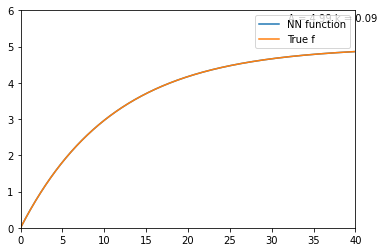

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


# animation settings
fig, ax = plt.subplots()
ax.set_xlim(( 0, 40))
ax.set_ylim((0, 6))
l = ['NN function', 'True f']
lines = [plt.plot([], [], label = l[i])[0] for i in range(2)]
texts = [ax.text(0.80, 0.95-i*0.05,  '', transform=ax.transAxes) for i in range(2)]

def f(x):
    return 5*(1-np.exp(-0.09*x))

def fk(x, A, k):
    return A*(1-np.exp(-k*x))

def distance(f, fk, b, n, A, i):
    S = 0
    for k in range(0, n+1):
        S += ((f(k*b/n)-fk(k*b/n, A, i))**2)*0.01
    return 0.5*S

alpha = 0.01
beta = 0.001
k = np.random.randint(0, 100)/100
A = np.random.randint(0, 10)
d = distance(f, fk, 100, 1000, A, k)
df_A = distance(f, fk, 100, 1000, A+0.01, k) - d 
dA = 0.01
df_k = distance(f, fk, 100, 1000, A, k+0.001) - d
dk = 0.001
n = 0

def init():
    for line in lines:
        line.set_data([], [])
    return lines

# animation function. This is called sequentially
def animate(i):
    global n 
    global A
    global k 
    global dA 
    global dk 
    global df_A 
    global df_k 
    global legend
    n += 1
    if dA :
        dA = -(alpha*df_A)/dA
    if dk :
        dk = -(beta*df_k)/dk
    df_A = distance(f, fk, 100, 1000, A+dA, k) - distance(f, fk, 100, 1000, A, k)
    df_k = distance(f, fk, 100, 1000, A, k+dk) - distance(f, fk, 100, 1000, A, k)
    A += dA
    k += dk
    d = distance(f, fk, 100, 1000, A, k)
    X = np.linspace(0, 40, 1000)
    Y1 = np.array([f(x) for x in X])   
    Y2 = np.array([fk(x, A, k) for x in X])   
    lines[0].set_data(X, Y2)
    lines[1].set_data(X, Y1)
    texts[0].set_text('A = '+str(A)[:4]+' '+'k = '+str(k)[:4])
    return lines

legend = plt.legend()    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=500, interval=10, blit=True)
HTML(anim.to_html5_video()) 

In pratique we don't code gradient descent algorithm from scratch to train NN, the example was just to demonstrate the functioning of the algorithm, in the other hand we have libraries that simplify the job for us and contains pre-defined functions we can work with.

  *   **NNs and ODEs**

$$Mathematical \; Foundations$$

Let's say we have an ODE system, given by:

$$u' = f(u,t) , t \in [0,1]$$
$$u(0)=u_0$$

Hence, we can understand the differential operation as a function on the domain $t$ with a known initial condition $u(0)=u_0$. 

As we know, Neural Networks are known as universal approximators. We will take advantage of this property of Neural Networks to use them to approximate the solution of the given ODE:

$$NN(t) \approx u(t)$$

Also, we may agree that the derivative of $NN(t)$ will give us a similar equation:

$$NN'(t) = f(NN(t),t)$$

So, if $NN(t)$ is really close to the true solution, then we could say that its derivate is also close to the derivative of the true solution, i.e.:

$$NN'(t) \approx f(u,t) , t \in t$$. 

Thus, we can turn this condition into our loss function. We have the given derivative function $f(u,t)$ and we can calculate the Neural Network derivative $NN'(t)$ at each step. This motivates the following loss function (which is the mean squared error of the two values):

$$L = \sqrt{\sum_i \left(\frac{dNN(t_i)}{dt} - f(u,t_i) \right)^2}$$

You may remember the initial condition, we still need to handle that. The most straight-forward way would do this by adding an initial condition term to the cost function. It would look like this:

$$L = \sqrt{(NN(0) - u_0)^2} + \sqrt{\sum_i \left(\frac{dNN(t_i)}{dt} - f(u,t_i) \right)^2}$$

While that would work, it may not be the best approach. We all know the crucial importance of the loss function on the training of the Neural Network, and we also know that the number of terms on this function will impact directly the stability of our training. More terms on the loss function would (usually) imply unstable training. 
To avoid it, we can encode the initial condition into the loss in a more efficient way. Let's define a new function and use it instead of directly using the neural network:

$$g(t) = u_0 + tNN(t)$$

It's easy to see that $g(t)$ will always satisfy the initial condition, since $g(0)$ will lead to $tNN(t) = 0$, leaving just the initial condition on the expression($u_t$). This way, we can train $g(t)$ to satisfy the ODE system instead of the Neural Network. Then, it will automatically be a solution to
the derivative function. We can incorporate this new idea into our loss function:

$$L = \sqrt{\sum_i \left(\frac{dg(t_i)}{dt} - f(u(t_i),t_i) \right)^2}$$

$$ Example $$

We are about to implement the described method in python using the TensorFlow library. In order to have a better understanding of the method, we will use a low-level design, avoiding a number of possible optimizations provided by the library. Our focus, at this moment, is to clearly understand and implement the ODE-solver Neural Network. For this reason, we will also choose a simply ODE:

$$u'= 2x$$
$$u(0)=1$$

We can easily solve this problem by integrating both sides of the solution, leading to $u + C = x^2 +C$, and after fitting $C$ to obey the initial condition
we have $u=x^2 + 1$. Nevertheless, instead of solving it analytically, let's try to solve using Neural Nets.

$$u'= 2x$$
$$ u = x^2 + C$$

Defining variables :

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# initial condition
f0 = 1
# infinitesimal small number
inf_s = np.sqrt(np.finfo(np.float32).eps)

# Parameters
learning_rate = 0.01
training_steps = 1000
batch_size = 100
display_step = training_steps/10

# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_output]))
}

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

Constructing the model :

In [ ]:
# Create model
def multilayer_perceptron(x):
    x = np.array([[[x]]],  dtype='float32')
    # Hidden fully connected layer with 32 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 32 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Output fully connected layer
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return tf.nn.sigmoid(output)

# Universal Approximator
def g(x):
    return x * multilayer_perceptron(x) + f0

# Given EDO
def f(x):
    return 2*x
    
# Custom loss function to approximate the derivatives
def custom_loss():
    summation = []
    for x in np.linspace(0,1,20):
        dNN = (g(x+inf_s)-g(x))/inf_s
        summation.append((dNN - f(x))**2)
    return tf.reduce_sum(tf.abs(summation))
    # return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

Training :

In [ ]:
def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss()
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for i in range(training_steps):
    train_step()
    if i % display_step == 0:
        print("loss: %f " % (custom_loss()))    

loss: 7.956747 
loss: 3.642170 
loss: 1.051773 
loss: 0.868906 
loss: 0.795419 
loss: 0.750295 
loss: 0.716765 
loss: 0.690447 
loss: 0.668831 
loss: 0.650704 


Results :

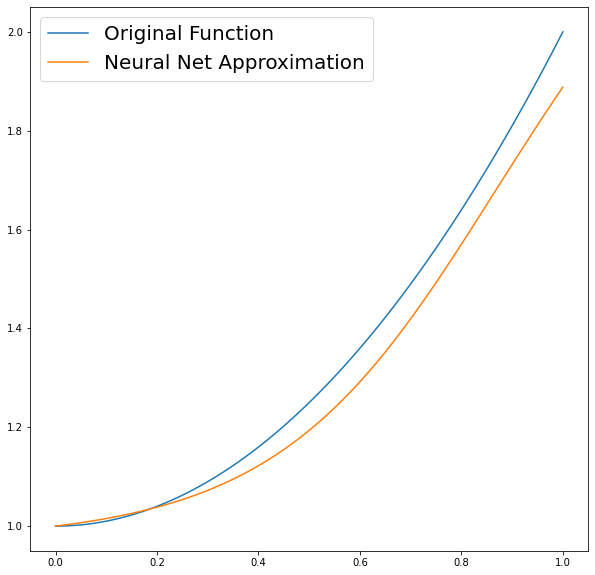

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10,10))
# True Solution (found analitically)
def true_solution(x):
    return x**2 + 1

X = np.linspace(0, 1, 100)
result = []
for i in X:
  # result.append(f(i))
  result.append(g(i).numpy()[0][0][0])

S = true_solution(X)
  
plt.plot(X, S, label="Original Function")
plt.plot(X, result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()

Of course the solution approximated by the NN is not perfectly equal to the true solutions but with few modifications on the model and the traning method it can give very accurate results. Here I've shown just a basic way to solve the problem using a NN, however the research in this field is vast and there a LOT of sophisticated approaches to do it.  

#3.   Application and simulation

At the end I would love to show you the magic of differential equations using the example of …

Chaos:

When we hear the word chaos we normally tend to imagine a system that we cannot predict its state or behavior, but that’s not the exact image.. to help you understand, I’ll give you the example of double pendulum, this system is simple, and we can easily find the kinematic equations by which we can calculate the position, velocity of any point at any instant knowing the initial position and velocity, however the double pendulum is considered as chaotic. Why? Well the answer resides in the words I’ve just said : “knowing the initial position”, How? Let’s say for example we tilted the pendulum to a certain angle, released it and observed the trajectory followed by the head of the pendulum, and then tilted the pendulum again to the same angle with a difference of 0.0001 radian, it will take a completely different trajectory, and that’s the chaos, when the present leads to a certain future but approximate present doesn’t lead to an approximate future. And that’s the problem of chaotic systems since the tools of measurement we have are not perfect, we can’t exactly measure the initial state of the system, so we can’t predict it’s behavior. 

Talking about chaotic systems, I wanted to present to you my best set of differential equations : 

Lorenz system :

The Lorenz system is a system of ordinary differential equations first studied by mathematician and meteorologist Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz strange attractor is a set of chaotic solutions of the Lorenz system. In popular media the "butterfly effect" stems from the real-world implications of the Lorenz attractor, i.e. that in any physical system, in the absence of perfect knowledge of the initial conditions (even the minuscule disturbance of the air due to a butterfly flapping its wings), our ability to predict its future course will always fail. This underscores that physical systems can be completely deterministic and yet still be inherently unpredictable even in the absence of quantum effects. The shape of the Lorenz attractor itself, when plotted graphically, may also be seen to resemble a butterfly.

The model is a system of three ordinary differential equations now known as the Lorenz equations:

<center>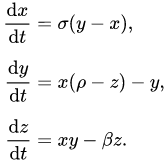 <center>

The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. In particular, the equations describe the rate of change of three quantities with respect to time: $x$ is proportional to the rate of convection, $y$ to the horizontal temperature variation, and $z$ to the vertical temperature variation.The constants $\sigma$ , $\rho$ , and $\beta$ are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself.

Of course the first thing we gonna do is to simulate this system using one of the numerical methods we saw, this time I'll use Euler's explicit method.

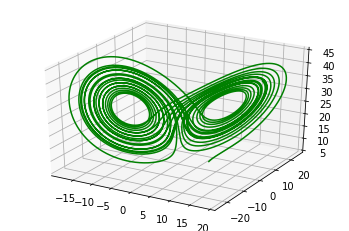

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import copy
from mpl_toolkits.mplot3d import Axes3D

##plotting


sigma = 11
gho = 28
beta = 8/3

def Fvect1(U):
    f1 = sigma*(U[1]-U[0])
    f2 = gho*U[0] - U[1] - U[0]*U[2]
    f3 = U[0]*U[1] - beta*U[2]
    return np.array([f1, f2, f3], dtype='float64')

def euler(f, U0, a, b, N):
    T = [a]
    Output = [U0]
    t = a
    h = (b-a)/N    
    U = copy.deepcopy(U0)
    X = [U0[0]]
    Y = [U0[1]]
    Z = [U0[2]]
    for _ in range(N):
        t += h
        T.append(t)
        U += h*f(U)
        Output.append(U)
        X.append(U[0])
        Y.append(U[1])
        Z.append(U[2])
    return T, X, Y, Z

U0 = np.array([6, 5, 5], dtype='float64') 
T, X, Y, Z = euler(Fvect1, U0, 0, 25, 400000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X, Y, Z, 'green')
plt.show()

Now isn't that THE REAL BEAUTY ? For this example I took certain values for $\sigma$ , $\rho$ , and $\beta$, but there are a lot of combinations that will give you different fascinating graphs. We can go forward and simulate the behavior of 25000 points that follows the same model (it well surely take a huge computation time) :

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://drive.google.com/uc?export=view&id=1rELJbEp7cjGnCUgo970gg3IqnYeqiSZp" frameborder="0" allowfullscreen></iframe>')


Lorenz system doesn't model only the fluid convection problem but a lot of different preblems with similar laws of evolution in lasers, dynamos, thermosyphons, brushless DC motors, electric circuits, chemical reactions and forward osmosis. And that's the magic of ODEs, they allow us to link completly different subjects but Behaviorally similar, which hepls us better understand the world around us. 

And as an example of linking different subjects we will mimic the Lorenz strange attractor’s behavior by an electric circuit based on operational amplifiers and analog multipliers to translate the derivation and multiplication operations on the signals. To make an integrator circuit we can use this : 

<center>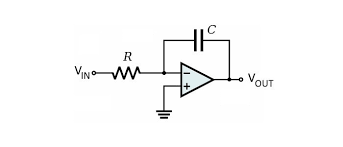 <center>

Let $i$ be the current floating from $V_{in}$ to $V_{out}$, since the Op Amp is in the linear mode, we can consider having a virtual ground in $V_{-}$, So :
$$V_{in}(t)=-R.i(t)$$ and $$i(t) = C.V_{out}(t)'$$ 
So : $$V_{out} = -\frac{1}{RC}\int V_{in}(t)dt $$

Following that logic we can make an entire circuit that follows the set of equations we have (It can be easily made in LTspice for example or Proteus) :

<center>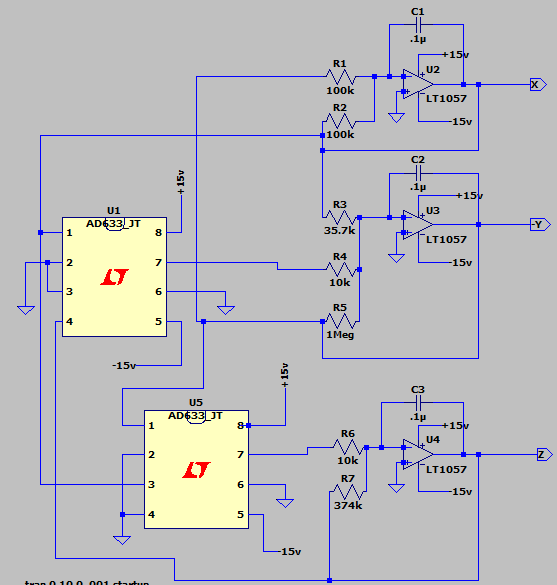 <center>

Then I started the visualization in the oscilloscope’s X-Y mode, and Taraaaaa

<center><img src="https://drive.google.com/uc?export=view&id=1pFtvW6tn-KLkW4wDEUe4eGzeSz-lVmDq" alt="fishy" class="bg-primary" width="800px" align="center"> <center>

# Conclusion

This was a short look into differential equations from different angles and aspects that showed us how they are deeply rooted in science and stand behind the full comprehension of every complicated phenomenon, everything mentioned in this article was supposed to be just a basic introduction of different sides of our subject and hopefully eyes-opening to the beauty and magic of mathematics and coding.